In [44]:
import sys
print(sys.executable)

C:\Users\ASUS\customer-segementation\venv\Scripts\python.exe


In [2]:
!jupyter kernelspec list

Available kernels:
  python3    C:\Users\ASUS\customer-segementation\venv\share\jupyter\kernels\python3
  venv       C:\Users\ASUS\AppData\Roaming\jupyter\kernels\venv


In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [3]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [7]:
import os
print(os.getcwd())


C:\Users\ASUS\customer-segementation\notebooks


In [8]:
df = pd.read_csv('../data/marketing_campaign.csv', delimiter='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
df = df.dropna()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [12]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [14]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date :",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date : 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [15]:
for i in dates:
    print(i)

2012-09-04
2014-03-08
2013-08-21
2014-02-10
2014-01-19
2013-09-09
2012-11-13
2013-05-08
2013-06-06
2014-03-13
2012-11-13
2013-11-15
2013-11-15
2012-10-10
2012-11-24
2012-12-24
2012-08-31
2013-03-28
2012-11-03
2012-08-08
2013-01-06
2012-12-23
2014-01-11
2013-03-18
2013-01-02
2013-05-27
2013-05-31
2013-11-22
2014-05-22
2013-05-11
2012-10-10
2012-10-29
2013-02-20
2013-08-29
2013-12-31
2013-09-02
2014-02-11
2013-02-01
2013-04-29
2013-03-12
2012-12-24
2013-10-02
2014-06-28
2012-11-09
2013-05-24
2012-11-08
2014-05-12
2012-08-11
2013-01-02
2014-06-07
2013-06-12
2012-11-19
2013-04-02
2014-04-28
2014-03-03
2013-07-04
2012-09-07
2013-02-18
2013-06-11
2013-12-06
2013-05-21
2014-05-11
2014-03-19
2013-09-27
2013-04-08
2012-09-11
2013-03-17
2013-04-05
2014-04-30
2012-12-19
2012-08-27
2012-10-12
2013-09-04
2013-01-02
2012-08-29
2013-06-23
2013-07-03
2013-05-11
2014-02-25
2013-08-11
2013-07-16
2014-05-28
2014-05-12
2014-01-21
2014-03-23
2014-05-24
2014-05-22
2012-11-22
2013-04-11
2013-12-01
2013-06-20

In [16]:
len(dates)

2216

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [18]:
days = []
d1 = max(dates)  # Newest customer enrollment date
for i in dates:
    delta = d1 - i
    days.append(delta)

df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,57283200000000000
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,9763200000000000
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,26956800000000000
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,12009600000000000
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,13910400000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,32918400000000000
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,1641600000000000
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,13392000000000000
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,13478400000000000


In [19]:
df["Age"] = 2021 - df["Year_Birth"]  # Calculate Age
df["Spent"] = (df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] +
                 df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,57283200000000000,64,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,9763200000000000,67,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,26956800000000000,56,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,12009600000000000,37,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,13910400000000000,40,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,32918400000000000,54,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,3,11,0,1641600000000000,75,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,13392000000000000,40,1241
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,13478400000000000,65,843


In [20]:
df["Living_With"] = df["Marital_Status"].replace(
    {"Married": "Partner", "Together": "Partner",
     "Absurd": "Alone", "Widow": "Alone",
     "YOLO": "Alone", "Divorced": "Alone",
     "Single": "Alone"}
)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Living_With
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,57283200000000000,64,1617,Alone
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,9763200000000000,67,27,Alone
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,26956800000000000,56,776,Partner
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,12009600000000000,37,53,Partner
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,13910400000000000,40,422,Partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,3,11,0,32918400000000000,54,1341,Partner
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,1,0,0,3,11,0,1641600000000000,75,444,Partner
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,3,11,0,13392000000000000,40,1241,Alone
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,3,11,0,13478400000000000,65,843,Partner


In [21]:
df["Education"] = df["Education"].replace(
    {"Basic": "Undergraduate", "2n Cycle": "Undergraduate",
     "Graduation": "Graduate", "Master": "Postgraduate",
     "PhD": "Postgraduate"}
)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Living_With
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,57283200000000000,64,1617,Alone
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,9763200000000000,67,27,Alone
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,26956800000000000,56,776,Partner
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,12009600000000000,37,53,Partner
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,13910400000000000,40,422,Partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,3,11,0,32918400000000000,54,1341,Partner
2236,4001,1946,Postgraduate,Together,64014.0,2,1,2014-06-10,56,406,...,1,0,0,3,11,0,1641600000000000,75,444,Partner
2237,7270,1981,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,3,11,0,13392000000000000,40,1241,Alone
2238,8235,1956,Postgraduate,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,3,11,0,13478400000000000,65,843,Partner


In [22]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID",
           "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5",
           "Complain", "Response", "Living_With"]
df = df.drop(to_drop, axis=1)
df

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,57283200000000000,64,1617
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,9763200000000000,67,27
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,26956800000000000,56,776
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,12009600000000000,37,53
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,13910400000000000,40,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,32918400000000000,54,1341
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,1641600000000000,75,444
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,13392000000000000,40,1241
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,13478400000000000,65,843


In [23]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Customer_For', 'Age', 'Spent'],
      dtype='object')

In [24]:
print(df.isnull().sum())  # Check missing values

Education              0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Customer_For           0
Age                    0
Spent                  0
dtype: int64


In [25]:
df.duplicated().sum()  # Check number of duplicate rows
df = df.drop_duplicates()  # Remove duplicates if any

In [26]:
df


,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,57283200000000000,64,1617
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,9763200000000000,67,27
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,26956800000000000,56,776
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,12009600000000000,37,53
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,13910400000000000,40,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,Graduate,666666.0,1,0,23,9,14,18,8,1,12,4,3,1,3,6,33868800000000000,44,62
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,32918400000000000,54,1341
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,13392000000000000,40,1241
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,13478400000000000,65,843


In [27]:
print(df.dtypes)

Education               object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Customer_For             int64
Age                      int64
Spent                    int64
dtype: object


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Education"] = le.fit_transform(df["Education"])
df

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,57283200000000000,64,1617
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,9763200000000000,67,27
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,26956800000000000,56,776
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,12009600000000000,37,53
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,13910400000000000,40,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,0,666666.0,1,0,23,9,14,18,8,1,12,4,3,1,3,6,33868800000000000,44,62
2235,0,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,32918400000000000,54,1341
2237,0,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,13392000000000000,40,1241
2238,1,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,13478400000000000,65,843


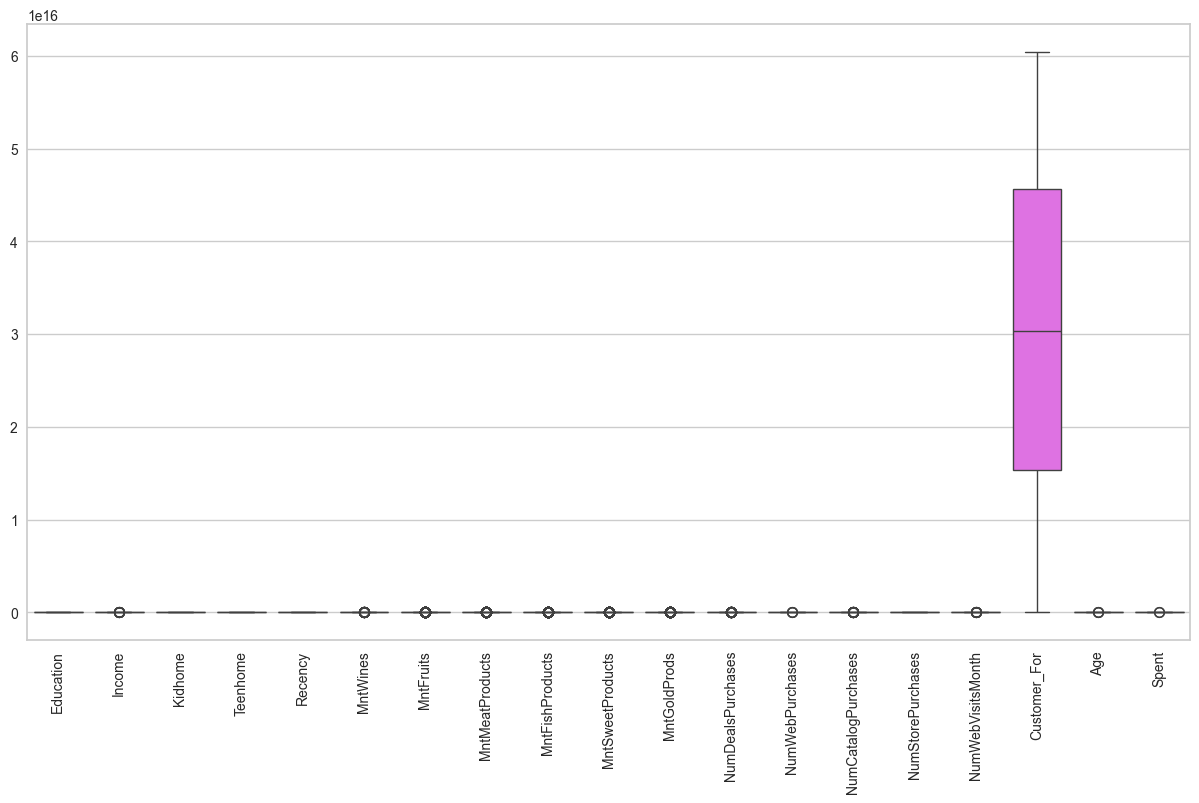

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing outliers using box plots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [30]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
df

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,9763200000000000,67,27
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,26956800000000000,56,776
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,12009600000000000,37,53
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,13910400000000000,40,422
5,1,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,25315200000000000,54,716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,1,44802.0,0,0,71,853,10,143,13,10,20,2,9,4,12,8,58492800000000000,51,1049
2232,0,26816.0,0,0,50,5,1,6,3,4,3,1,0,0,3,4,58838400000000000,35,22
2237,0,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,13392000000000000,40,1241
2238,1,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,13478400000000000,65,843


In [31]:
lower_bound


Education             -1.500000e+00
Income                -1.415025e+04
Kidhome               -1.500000e+00
Teenhome              -1.500000e+00
Recency               -5.100000e+01
MntWines              -7.000000e+02
MntFruits             -4.450000e+01
MntMeatProducts       -3.050000e+02
MntFishProducts       -6.750000e+01
MntSweetProducts      -4.850000e+01
MntGoldProds          -6.150000e+01
NumDealsPurchases     -2.000000e+00
NumWebPurchases       -4.000000e+00
NumCatalogPurchases   -6.000000e+00
NumStorePurchases     -4.500000e+00
NumWebVisitsMonth     -3.000000e+00
Customer_For          -2.998080e+16
Age                    1.700000e+01
Spent                 -1.398750e+03
dtype: float64

In [32]:
upper_bound

Education              2.500000e+00
Income                 1.183398e+05
Kidhome                2.500000e+00
Teenhome               2.500000e+00
Recency                1.490000e+02
MntWines               1.228000e+03
MntFruits              7.950000e+01
MntMeatProducts        5.510000e+02
MntFishProducts        1.205000e+02
MntSweetProducts       8.350000e+01
MntGoldProds           1.265000e+02
NumDealsPurchases      6.000000e+00
NumWebPurchases        1.200000e+01
NumCatalogPurchases    1.000000e+01
NumStorePurchases      1.550000e+01
NumWebVisitsMonth      1.300000e+01
Customer_For           9.097920e+16
Age                    8.900000e+01
Spent                  2.515250e+03
dtype: float64

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [34]:
df_scaled

array([[-0.94808782,  0.17032715,  0.78038034, ..., -1.10604037,
         1.35009082, -0.76561171],
       [-0.94808782,  1.64678843, -1.05478509, ..., -0.10810104,
         0.38269786,  1.21829526],
       [-0.94808782, -0.98062202,  0.78038034, ..., -0.97565634,
        -1.28825362, -0.69674445],
       ...,
       [-0.94808782,  0.79184437, -1.05478509, ..., -0.89542001,
        -1.02441918,  2.4499598 ],
       [ 0.50911891,  1.50842679, -1.05478509, ..., -0.89040524,
         1.17420119,  1.3957609 ],
       [ 0.50911891,  0.55158125,  0.78038034, ...,  1.44647781,
         1.35009082, -0.38154428]], shape=(1371, 19))

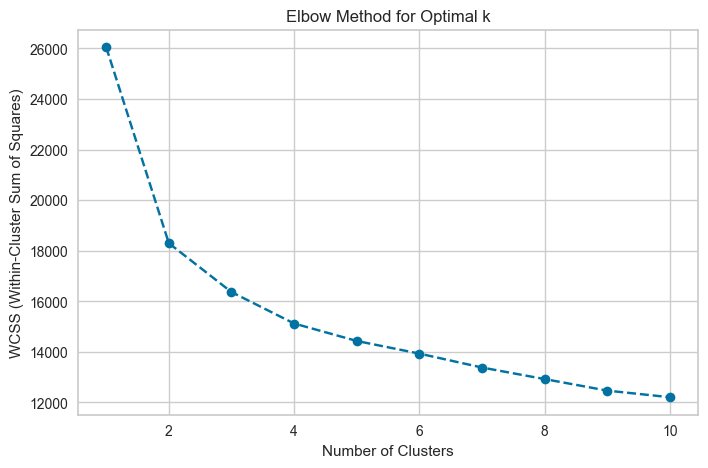

In [35]:
from sklearn.cluster import KMeans
import numpy as np

wcss = []
K = range(1, 11)  # Testing cluster sizes from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [36]:
optimal_k = 3  # Set the best value found from the Elbow Method

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [37]:
df

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Cluster
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,9763200000000000,67,27,0
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,26956800000000000,56,776,1
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,12009600000000000,37,53,0
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,13910400000000000,40,422,2
5,1,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,25315200000000000,54,716,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,1,44802.0,0,0,71,853,10,143,13,10,20,2,9,4,12,8,58492800000000000,51,1049,2
2232,0,26816.0,0,0,50,5,1,6,3,4,3,1,0,0,3,4,58838400000000000,35,22,0
2237,0,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,13392000000000000,40,1241,1
2238,1,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,13478400000000000,65,843,1


In [38]:
# Visualizing the mean values of each cluster
df.groupby("Cluster").mean()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent
Cluster,,,,,,,,,,,,,,,,,,,
0,0.693154,33193.036675,0.831296,0.422983,48.991443,30.745721,4.215159,18.754279,5.737164,4.371638,12.544010,1.905868,1.922983,0.429095,3.067237,6.427873,2.720322e+16,48.753056,76.367971
1,0.581281,67927.123153,0.098522,0.517241,49.487685,569.458128,32.044335,252.088670,51.970443,35.852217,45.586207,2.068966,5.615764,4.610837,8.669951,3.871921,3.030427e+16,54.655172,987.000000
2,0.591429,53142.700000,0.251429,0.902857,49.062857,333.420000,10.748571,80.740000,14.425714,9.674286,38.051429,3.217143,5.540000,2.088571,6.508571,5.937143,3.173497e+16,56.671429,487.060000


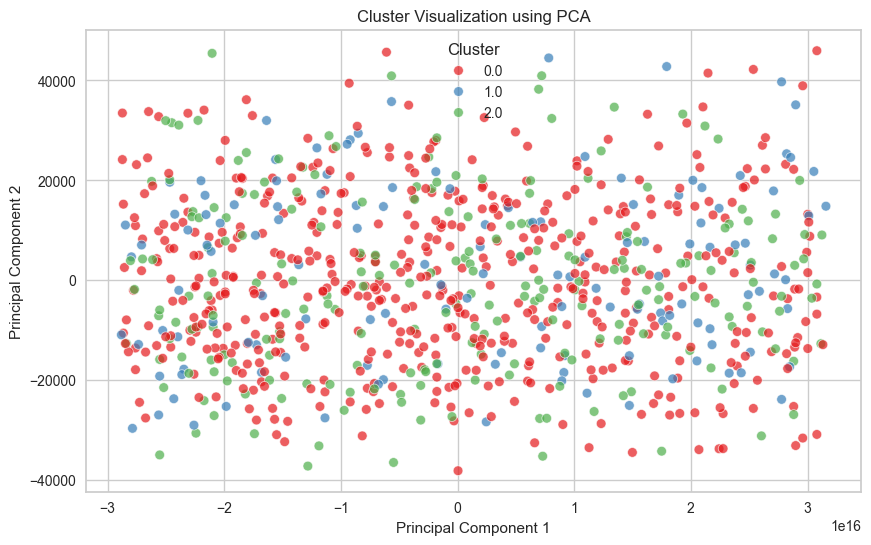

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns=['Cluster']))  # Drop non-numeric column if needed

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Cluster'], palette='Set1', alpha=0.7)
plt.title("Cluster Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

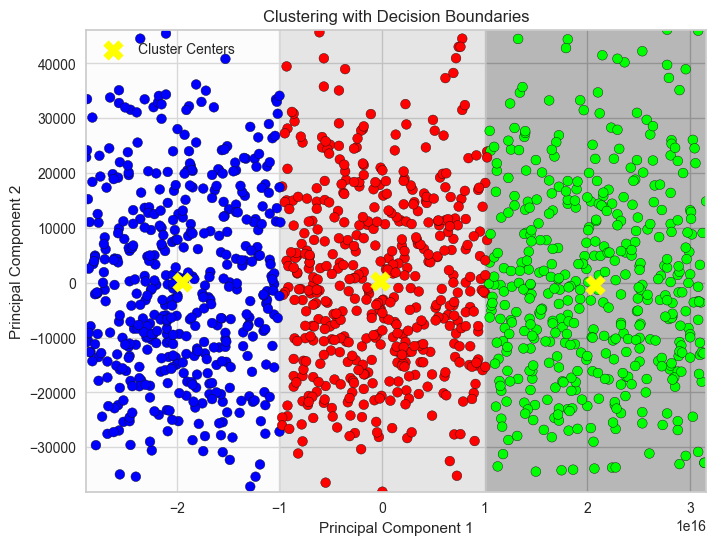

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 3: Apply PCA to Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop(columns=['Cluster']))

# Step 4: Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

# Step 5: Create Decision Boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict cluster labels for each point in the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 6: Plot the Results
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)  # Decision Boundaries
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='brg', edgecolors='k')  # Data Points

# Optional: Mark Cluster Centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', marker='X', s=200, label="Cluster Centers")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clustering with Decision Boundaries")
plt.legend()
plt.show()

In [41]:
# Mapping Clusters to Meaningful Names
cluster_names = {
    0: "Price-Sensitive Families",
    1: "Luxury Shoppers & VIP Customers",
    2: "Balanced Spenders"
}

# Create a new column with cluster names
df['Cluster Name'] = df['Cluster'].map(cluster_names)

In [42]:
df

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Cluster,Cluster Name
1,0,46344.0,1,1,38,11,1,6,2,1,...,2,1,1,2,5,9763200000000000,67,27,0,Price-Sensitive Families
2,0,71613.0,0,0,26,426,49,127,111,21,...,1,8,2,10,4,26956800000000000,56,776,1,Luxury Shoppers & VIP Customers
3,0,26646.0,1,0,26,11,4,20,10,3,...,2,2,0,4,6,12009600000000000,37,53,0,Price-Sensitive Families
4,1,58293.0,1,0,94,173,43,118,46,27,...,5,5,3,6,5,13910400000000000,40,422,2,Balanced Spenders
5,1,62513.0,0,1,16,520,42,98,0,42,...,2,6,4,10,6,25315200000000000,54,716,1,Luxury Shoppers & VIP Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,1,44802.0,0,0,71,853,10,143,13,10,...,2,9,4,12,8,58492800000000000,51,1049,2,Balanced Spenders
2232,0,26816.0,0,0,50,5,1,6,3,4,...,1,0,0,3,4,58838400000000000,35,22,0,Price-Sensitive Families
2237,0,56981.0,0,0,91,908,48,217,32,12,...,1,2,3,13,6,13392000000000000,40,1241,1,Luxury Shoppers & VIP Customers
2238,1,69245.0,0,1,8,428,30,214,80,30,...,2,6,5,10,3,13478400000000000,65,843,1,Luxury Shoppers & VIP Customers


In [43]:
# Visualizing the mean values of each cluster
df.groupby("Cluster Name").mean()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Cluster
Cluster Name,,,,,,,,,,,,,,,,,,,,
Balanced Spenders,0.591429,53142.700000,0.251429,0.902857,49.062857,333.420000,10.748571,80.740000,14.425714,9.674286,38.051429,3.217143,5.540000,2.088571,6.508571,5.937143,3.173497e+16,56.671429,487.060000,2.0
Luxury Shoppers & VIP Customers,0.581281,67927.123153,0.098522,0.517241,49.487685,569.458128,32.044335,252.088670,51.970443,35.852217,45.586207,2.068966,5.615764,4.610837,8.669951,3.871921,3.030427e+16,54.655172,987.000000,1.0
Price-Sensitive Families,0.693154,33193.036675,0.831296,0.422983,48.991443,30.745721,4.215159,18.754279,5.737164,4.371638,12.544010,1.905868,1.922983,0.429095,3.067237,6.427873,2.720322e+16,48.753056,76.367971,0.0


In [45]:
!git remote add origin https://github.com/prateekdayal/clustering-using-elbow.git
!git branch -M main
!git add .
!git commit -m "Initial commit: Customer segmentation project"
!git push -u origin main

[main 21234e6] Initial commit: Customer segmentation project
 2 files changed, 8075 insertions(+)
 create mode 100644 notebooks/.ipynb_checkpoints/Untitled1-checkpoint.ipynb
 create mode 100644 notebooks/Untitled1.ipynb


remote: Repository not found.
fatal: repository 'https://github.com/prateekdayal/clustering-using-elbow.git/' not found
